# import librairies

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# load data

In [100]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

shape test_image (28, 28)


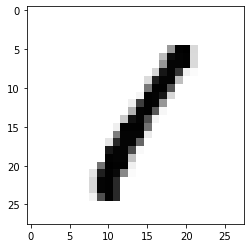

In [101]:
idx = 3  # label 1
test_image = x_train[idx]
print("shape test_image", np.shape(test_image))
plt.imshow(test_image, cmap='Greys')

# find primers

In [102]:
# build a filter
f_vert_top_primer = np.array([[0, -1, 0],
                              [0, 1, 0],
                              [0, 1, 0]])
f_vert_top_primer = np.expand_dims(f_vert_top_primer, axis=[2, 3])
print("shape f_vert_top_primer", np.shape(f_vert_top_primer))
tf.convert_to_tensor(f_vert_top_primer, dtype='float32')

# convert image to tensor
input_image = np.expand_dims(test_image, axis=[0, 3])
print("shape input_image", np.shape(input_image))
input_image = tf.convert_to_tensor(input_image, dtype='float32')

# apply convolution
primers = tf.nn.conv2d(input_image, f_vert_top_primer, strides=1, padding='VALID', name="conv1")

shape f_vert_top_primer (3, 3, 1, 1)
shape input_image (1, 28, 28, 1)


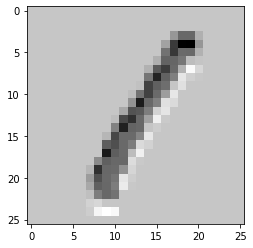

In [103]:
# plot primers
plt.imshow(primers[0, ..., 0], cmap='Greys')

In [104]:
# keep max value
np_primers = primers.numpy()
np_primers = np_primers[0, ..., 0]
print(np.shape(np_primers))
primer_pos_x = np.argmax(np.amax(np_primers, axis=0))
primer_pos_y = np.argmax(np.amax(np_primers, axis=1))
print("primer pos; ({}, {})".format(primer_pos_x, primer_pos_y))


(26, 26)
primer pos; (19, 4)


In [105]:
def find_primer(image, filter, do_plot=False):
    filter = np.expand_dims(filter, axis=[2, 3])
    tf.convert_to_tensor(filter, dtype='float32')

    # convert image to tensor
    if len(np.shape(image)) == 2:
        image = np.expand_dims(image, axis=[0, 3])
    else:
        print("image shape is wrong! Expected 2 got ", len(np.shape(image)))
    image = tf.convert_to_tensor(image, dtype='float32')

    # apply convolution
    primers = tf.nn.conv2d(image, filter, strides=1, padding='VALID', name="conv1")

    # keep max value
    np_primers = primers.numpy()
    np_primers = np_primers[0, ..., 0]
    primer_pos_x = np.argmax(np.amax(np_primers, axis=0))
    primer_pos_y = np.argmax(np.amax(np_primers, axis=1))

    if do_plot:
        # plot primers
        plt.imshow(primers[0, ..., 0], cmap='Greys')

    return (primer_pos_x, primer_pos_y)

In [106]:
# find top primers for vertical lines
f_vert_top_primer = np.array([[0, -1, 0],
                              [0, 1, 0],
                              [0, 1, 0]])
primer_top_pos = find_primer(test_image, f_vert_top_primer)
print("primer_top_pos", primer_top_pos)

primer_top_pos (19, 4)


In [119]:
# find down primers for vertical lines
f_vert_down_primer = np.array([[0, 1, 0],
                              [0, 1, 0],
                              [0, -1, 0]])
primer_down_pos = find_primer(test_image, f_vert_down_primer)
print("primer_down_pos", primer_down_pos)

primer_down_pos (9, 23)


In [121]:
# merge primers
primers_pos = np.array([primer_top_pos, primer_down_pos])
print("primers_pos")
print(primers_pos)

primers_pos
[[19  4]
 [ 9 23]]


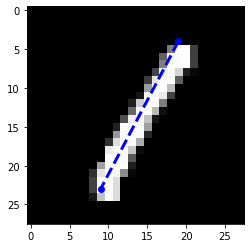

In [122]:
# plot both primers

# transform img into RGB
rgb_im = np.repeat(np.expand_dims(test_image, axis=2), 3, axis=2)

# add primers
plt.plot([primers_pos[0, 0], primers_pos[1, 0]],[primers_pos[0, 1], primers_pos[1, 1]], color='blue', linestyle='dashed', marker='o', linewidth=3)

# show primers
plt.imshow(rgb_im)

In [146]:
# build pattern for digit "1"
patterns = np.array([[[14, 4], [14, 22]], [[8, 10], [14, 4]]])

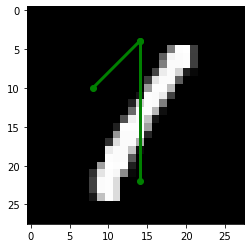

In [147]:
# plot pattern

# transform img into RGB
rgb_im = np.repeat(np.expand_dims(test_image, axis=2), 3, axis=2)

# add patterns
for pattern in patterns:
    plt.plot([pattern[0, 0], pattern[1, 0]],[pattern[0, 1], pattern[1, 1]], color='green', linestyle='solid', marker='o', linewidth=3)

# show primers
plt.imshow(rgb_im)

In [157]:
# compute norm-referenced
refs = patterns[:, 0]
tunings = patterns[:, 1] - refs
print("refs")
print(refs)
print("tunings")
print(tunings)

# compute relative tuning difference from ref set at (0, 0)
v = np.array([primers_pos[1] - primers_pos[0]])
print("v")
print(v)

# compute projections
print()
proj = 0
for p in range(len(patterns)):
    try:
        print("len tun", np.linalg.norm(tunings[p]))
        print("len v", np.linalg.norm(v[p]))
        proj += np.amax(np.dot(v[p], tunings[p] / np.linalg.norm(tunings[p])), 0)
    except:
        print("pattern not found")
    print("len proj", proj)

refs
[[14  4]
 [ 8 10]]
tunings
[[ 0 18]
 [ 6 -6]]
v
[[-10  19]]

len tun 18.0
len v 21.470910553583888
len proj 19.0
len tun 8.48528137423857
pattern not found
len proj 19.0


In [ ]:
"""
find a way to test that a one with non touching lines fails
test with a one that has the first upwards line (need to add filters)
test with a seven (possibly needs to add a new filter as well for the horizontal line)

"""